## BMI 값을 예측하는 회귀 모델

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [2]:
# 데이터셋 인스턴스 생성

df = pd.read_csv('C:/AI_Dataset/diabetes.csv')  # CSV 파일 경로

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df = df.drop('Outcome', axis = 1)

In [6]:
# 데이터와 타겟 분리
X = df.drop('BMI', axis=1).values
y = df['BMI'].values

In [7]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [9]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614]),
 torch.Size([154]))

In [11]:
class DiabeteEvaluationRegression(nn.Module):
    def __init__(self):
        super(DiabeteEvaluationRegression, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [12]:
model = DiabeteEvaluationRegression()

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
# Variables to store loss and accuracy
train_losses = []
test_losses = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            total_loss += loss.item()

    test_loss = total_loss / len(test_dataloader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Test Loss: {test_loss:.4f}")

print("Training complete.")

Epoch 1/30, Loss: 648.0619, Test Loss: 123.9178
Epoch 2/30, Loss: 130.9153, Test Loss: 101.7988
Epoch 3/30, Loss: 70.9718, Test Loss: 76.9844
Epoch 4/30, Loss: 55.6237, Test Loss: 74.5370
Epoch 5/30, Loss: 48.6940, Test Loss: 69.1725
Epoch 6/30, Loss: 45.5221, Test Loss: 65.8225
Epoch 7/30, Loss: 43.8162, Test Loss: 65.1305
Epoch 8/30, Loss: 42.5889, Test Loss: 63.0501
Epoch 9/30, Loss: 48.5156, Test Loss: 62.7179
Epoch 10/30, Loss: 40.5934, Test Loss: 65.4328
Epoch 11/30, Loss: 40.1310, Test Loss: 63.1527
Epoch 12/30, Loss: 40.0893, Test Loss: 65.5731
Epoch 13/30, Loss: 39.2363, Test Loss: 65.6363
Epoch 14/30, Loss: 39.5145, Test Loss: 65.0970
Epoch 15/30, Loss: 37.8306, Test Loss: 62.7508
Epoch 16/30, Loss: 36.3899, Test Loss: 66.3400
Epoch 17/30, Loss: 35.8393, Test Loss: 64.1490
Epoch 18/30, Loss: 36.0942, Test Loss: 63.6363
Epoch 19/30, Loss: 36.3940, Test Loss: 63.1625
Epoch 20/30, Loss: 34.3011, Test Loss: 68.0864
Epoch 21/30, Loss: 37.8778, Test Loss: 62.3231
Epoch 22/30, Loss:

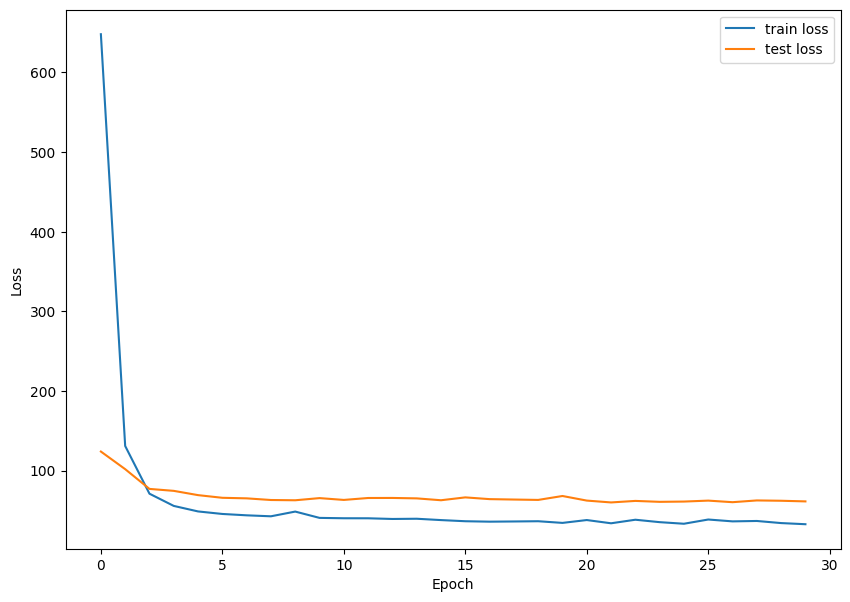

In [14]:

# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(num_epochs), train_losses, label='train loss')
plt.plot(range(num_epochs), test_losses, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()